<center>
<img src="../Graphics/logo.png" width="600" />    
</center> 

# 01 - Introduction to scientific computing with Python in Jupyter

This tutorial is part of the [Quantum Chemistry Foundations](https://github.com/fevangelista/Quantum-Chemistry-Foundations) series.

Francesco A. Evangelista

---

## Useful tidbits of Python

In this tutorial we will look at some important basic aspects of scientific computing with Python. Before we start, let's look at some useful tricks in Python.

When printing data, it's convenient to use **formatted strings**. A formatted string starts with an `f` and you can reference variables in it by surrounding them with braces (`{}`). Here are some examples of formatted strings used in printing

In [1]:
# print the content of a variable
x = 3.14159265359
print(f'{x = }')

x = 3.14159265359


In [2]:
# print some text and a variable
print(f'π = {x:.3f} (rounded to three decimals)')

π = 3.142 (rounded to three decimals)


## Representing numerical data

Python can stored both integers and floating-point numbers. These two types work differently. Integers are stored with exact precision. This means that if we make an arbitrarily large integer, we can represent any operation on it without loosing accuracy.

Let's create the integer $10^{99}$

In [3]:
n = 10 ** 99
print(n)

1000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000


we can add 1 to $n$ and represent the result exactly (here we use formatted strings, to conveniently print variables and text)

In [4]:
m = n + 1
print(f'{m = }')

m = 1000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000001


We can correctly compute the difference of $m$ and $n$ and and the two numbers are not equal (which we test with `==`)

In [5]:
print(f'{m - n = }')
print(f'm == n is {m == n}')

m - n = 1
m == n is False


Floating-point numbers are represented instead using a binary fraction and have limited precision. For example, this sum does not evaluate to what you would expect

In [1]:
0.1 + 0.2

0.30000000000000004

For double-precision floating-point numbers, you should expect numbers to be represented with a relative accuracy of about $10^{-15}$. Here if we add one to the number $x = 10^{15}$ we retain enough precision to correctly evaluate the difference $(10^{15} + 1) - (10^{15})$

In [7]:
x = 1.0e15
y = x + 1
print(f'{y - x = }')
print(f'y == x is {y == x}')

y - x = 1.0
y == x is False


However, if we set $x = 10^{16}$ subtracting the two numbers gives zero and Python thinks the two numbers are the *same*

In [8]:
x = 1.0e16
y = x + 1
print(f'{y - x = }')
print(f'y == x is {y == x}')

y - x = 0.0
y == x is True


This is because the numbers $10^{16} + 1$ and $10^{16}$  round to the same binary fraction within the finite accuracy representation used by Python.

## Storing and manipulating vectors, matrices, and tensors with `numpy`

In Python you can represent vectors using lists. Elements of a vector can be accessed and modified

In [9]:
vec = [1.0, -1.0, 2.0]
vec[0] = 0.5
sqr = vec[0] * vec[0] + vec[1] * vec[1] + vec[2] * vec[2]
print(vec)
print(sqr)

[0.5, -1.0, 2.0]
5.25


You can even extend this to treat matrices (list of lists) and tensors, but this is in practice a *bad idea*. Why? There are several reasons:

- **Performance**. Due to the way it works, Python is very slow at performing operations on vectors.
- **Complexity**. Expressing many mathematical operations on vectors, matrices, and tensors can require writing several lines of Python.
- **Potential for errors**. The more code you have to write, the more likely it will contain errors in it.

A better solution is to use a library that specializes in manipulating arbitrary-order tensors, like `numpy`. Let's import numpy and look at how we can store vectors with it

In [3]:
import numpy as np

Creating vectors 

In [4]:
np_vec = np.array([1.0, -1.0, 2.0])
print(np_vec)

[ 1. -1.  2.]


To create a vector with 10 entries initialized to zero and set the fourth entry (with index equal to 3) to 5 we simply do the following

In [11]:
v = np.zeros((10))
v[3] = 5
print(f'{v = }')

v = array([0., 0., 0., 5., 0., 0., 0., 0., 0., 0.])


Notice that `numpy` refers to vectors, matrices, and tensors with the generic term array.
    
Let's create two lists and numpy arrays fill them with the numbers $0, 1, \ldots, N - 1$, where $N = 10^{6}$

In [12]:
import time # for timing purposes only

N = 10**7

a_list = [i for i in range(N)]
b_list = [i for i in range(N)]

a_array = np.arange(N)
b_array = np.arange(N)

Next, let's add up the two vectors ($\mathbf{a} + \mathbf{b}$) stored as a list and compute their dot product ($\mathbf{a} \cdot \mathbf{b}$).
We will surround these instructions with calls to `perf_counter()` to get the total timing for these operations

In [13]:
start = time.perf_counter()

# add vectors
c_list = [x + y for x, y in zip(a_list,b_list)]

# dot product
dot = 0.0
for x, y in zip(a_list,b_list):
    dot += x * y

end = time.perf_counter()

time_list = end - start
print(f'Timing for list: {time_list} seconds')
print(f'{dot = }')

Timing for list: 1.3458919169934234 seconds
dot = 3.333332833337171e+20


Now, we repeat the same operations using `numpy`

In [14]:
start = time.perf_counter()

# add vectors
c_array = a_array + b_array

# dot product
dot = np.dot(a_array, b_array)

end = time.perf_counter()
time_np = end - start
print(f'Timing for list: {time_np} seconds')
print(f'{dot = }')

Timing for list: 0.013286166999023408 seconds
dot = 1291890006563070912


Finally, we can compute the speedup achieved by numpy compared to the naïve Python implementation

In [15]:
time_list / time_np

101.30024085143235

This test shows a speed up of two orders of magnitude! 🥳

## The basics of NumPy

Let's explore some basic features of numpy. Arrays are characterized by the number of axes (also called rank), the range of values each index can take, and the type of data it stores. Creating a matrix (an array with two axes/indices) of dimensions $3 \times 7$ with all zero entries can be done by passing a shape in the form of a tuple

In [34]:
A = np.zeros((3,7)) # same as np.zeros(shape=(3,7))
print(A)

[[0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]]


In [35]:
# show the shape of this array
print(f'{A.shape = }')

A.shape = (3, 7)


In [36]:
# show the type of data stored in this array
print(f'{A.dtype = }')

A.dtype = dtype('float64')


This example also shows how to access the shape and the data type stored by the array.

Filling an array with zeros requires paying a small overhead for setting all the values to 0, but it is good practice since we could have bugs if we allocate an array and only set a fraction of the entries, assuming the rest should be zero.

Here are two other ways to initialize arrays

In [28]:
# fill B with a 4 x 3 matrix of ones
B = np.ones((4,3))
print(B)

[[1. 1. 1.]
 [1. 1. 1.]
 [1. 1. 1.]
 [1. 1. 1.]]


In [29]:
# allocate memory for a 5 x 6 matrix but do not initialize it (not recommended)
# this may give a different result every time you run it
C = np.empty((5,6))
print(C)

[[0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]]


We can access elements of an array in the following way

In [18]:
# access element with indices (2,3) of A (all indices start from zero!)
A[2,3]

0.0

Once we have stored data in arrays, there are many operations we can easily perform with numpy. If there is a function in numpy that will do what you need, as a general rule, use it instead of writing Python code. You are certainly guaranteed that it will be faster and correct. Here are some examples

In [30]:
x = np.array([0,1,2,3,4,5,6,7,8])
y = np.array([2,7,8,1,3,4,5,2,6])

# add two arrays
z = x + y
print(f'{z = }')

z = array([ 2,  8, 10,  4,  7,  9, 11,  9, 14])


In [31]:
# scale and shift arrays
print(f'{x * 10 = }')
print(f'{x + 10 = }')

x * 10 = array([ 0, 10, 20, 30, 40, 50, 60, 70, 80])
x + 10 = array([10, 11, 12, 13, 14, 15, 16, 17, 18])


In [32]:
# element-wise multiplication and divisition
print(f'{x * x = }')
print(f'{x / y = }')

x * x = array([ 0,  1,  4,  9, 16, 25, 36, 49, 64])
x / y = array([0.        , 0.14285714, 0.25      , 3.        , 1.33333333,
       1.25      , 1.2       , 3.5       , 1.33333333])


In [33]:
# element-wise functions
print(f'{np.exp(x) = }')

np.exp(x) = array([1.00000000e+00, 2.71828183e+00, 7.38905610e+00, 2.00855369e+01,
       5.45981500e+01, 1.48413159e+02, 4.03428793e+02, 1.09663316e+03,
       2.98095799e+03])


## Slicing arrays

Often it is necessary to access parts of an array. Slicing offers a convenient way to do so without actually copying the data. Slicing follows the same format as accessing an element of an array but instead of a number we pass the beginning and the end (non inclusive) indices of the array. In this example, we get a slice from the second to the fourth element of the array `v`

In [37]:
v = np.array([3,4,5,6,9,0,-2,3])

# print the content of a slice
print(v[1:4])

[4 5 6]


In [40]:
# we can reference slices
sl = v[1:4]

# and access elements in the slice
print(f'{sl[0] = }')

sl[0] = 4


In [41]:
# or modify them
sl[1] = -7
print(f'{sl = }')
print(f'{v = }')

sl = array([ 4, -7,  6])
v = array([ 3,  4, -7,  6,  9,  0, -2,  3])


We can also create slices that skip over data

In [21]:
# grab the first three elements with even indices
v[0:6:2]

array([ 3, -7,  9])

For matrices and tensors, we can also specify all the elements in an index with `:`. The following code grabs the first column of the matrix $M$

In [22]:
M = np.array([[0,1,2,3],
              [4,5,6,7]])
print(f'{M = }')

# grab the first column
column0 = M[:,0]
print(f'{column0 = }')

# grab the second row
row1 = M[1,:]
print(f'{row1 = }')

M = array([[0, 1, 2, 3],
       [4, 5, 6, 7]])
column0 = array([0, 4])
row1 = array([4, 5, 6, 7])


## Arrays and data ownership ⚠️

Python variables are references to values. This means that when we write code like
```python
n = [10, 20]
```
we should think of this as *the variable* `n` *is pointing to the list* `[10, 20]`. It is a good idea to become familiar with this concept because it has important consequence when we write code. Consider the following example

In [23]:
# create the array x = [0,1,2,3,4,5]
x = np.array([0,1,2,3,4,5])

# set y to x
y = x

# modify the first element of y
y[0] = 9

What do you expect the arrays `x` and `y` to look like after this code is executed? Let's check 🔍

In [24]:
print(f'{x = }')
print(f'{y = }')

x = array([9, 1, 2, 3, 4, 5])
y = array([9, 1, 2, 3, 4, 5])


The two arrays show the same change, and that's because both `x` and `y` are variables that point to the **same underlying data**. If we want to copy the data of an array we can call the `copy()` method

In [25]:
# copy the data in x and then change z
z = x.copy()
z[0] = 3

print(f'{x = }')
print(f'{z = }')

x = array([9, 1, 2, 3, 4, 5])
z = array([3, 1, 2, 3, 4, 5])


## Plotting data

We will often want to visualize data contained in arrays. We can do this with the library `matplotlib`. The next two examples demonstrate plotting a vector and a matrix

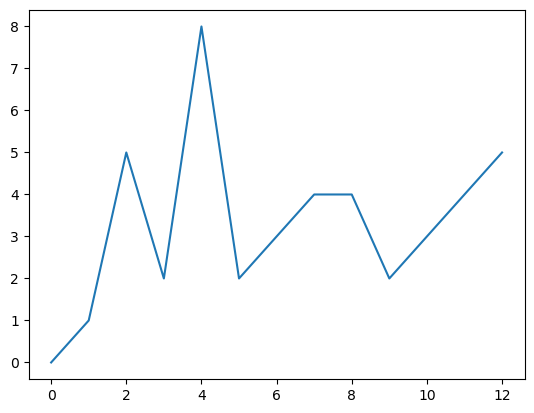

In [26]:
import matplotlib.pylab as plt

x = np.array([0,1,5,2,8,2,3,4,4,2,3,4,5])
plt.plot(x)

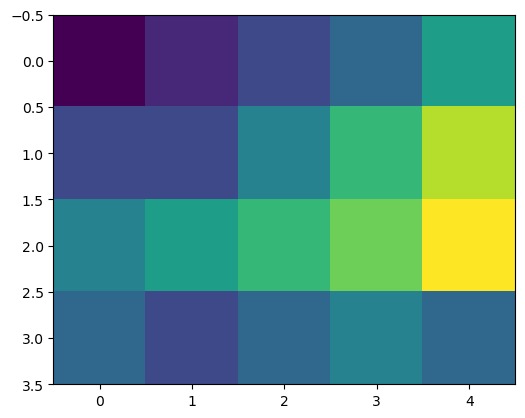

In [27]:
M = np.array([[0,1,2,3,5],
              [2,2,4,6,8],
              [4,5,6,7,9],
              [3,2,3,4,3]])

plt.imshow(M)

## Other useful tricks

When printing large arrays, it is convenient to create an output that can fit in the screen.
One way to do so is to tell `numpy` to print an array with fixed precision:

In [9]:
A = np.array([[0,1/3.,6],
              [1,-1/7.,2]])

# normal print
print(A)

# print up to three decimals
with np.printoptions(precision=3, suppress=True):
    print(A)

[[ 0.          0.33333333  6.        ]
 [ 1.         -0.14285714  2.        ]]
[[ 0.     0.333  6.   ]
 [ 1.    -0.143  2.   ]]
